In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch as t
import torch.nn as nn
import torch.nn.functional as F
from beartype import beartype as typed
from beartype.door import die_if_unbearable as assert_type
from datasets import load_dataset
from jaxtyping import Float, Int, Bool
from typing import Callable
from torch import Tensor as TT
from transformers import AutoModelForCausalLM, AutoTokenizer
from einops import einops as ein

%load_ext autoreload
%autoreload 2

In [2]:
model_name = "Mlxa/brackets-nested"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [3]:
from transformers import GPTNeoForCausalLM

tensor([5.5813, 6.2769, 0.5292, 0.4052, 5.4265, 6.2129, 6.5600, 6.4918, 0.5245,
        0.4673, 0.4453, 0.5814, 5.5760, 0.6171, 5.5534, 6.4029, 0.5231, 0.5809,
        5.5301, 6.0136, 6.6395, 0.4820, 0.5516, 0.5455])


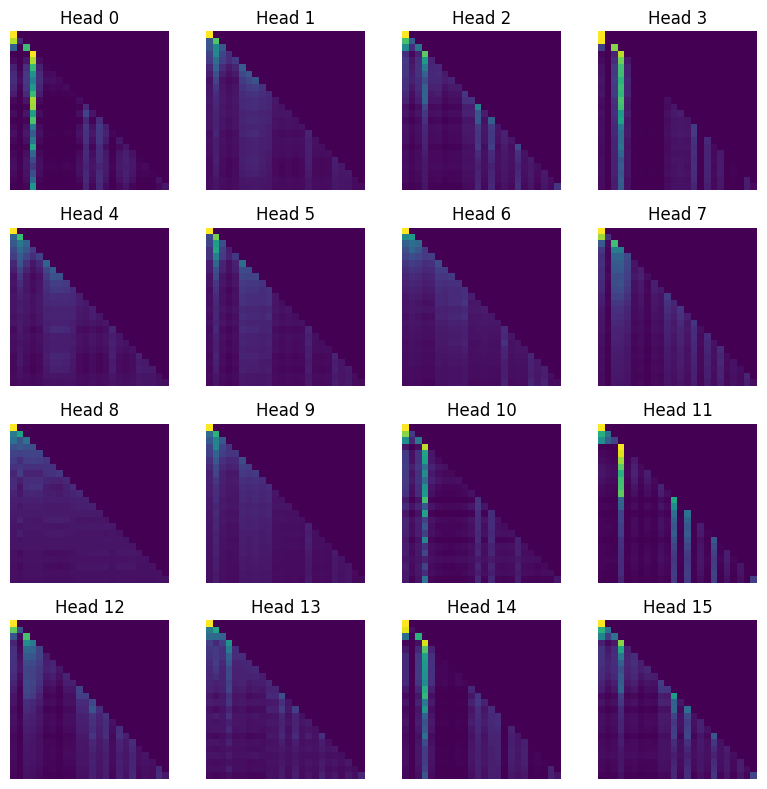

In [168]:
from language_modeling import get_losses, prompt_from_template
from activation_analysis import show_patterns
from IPython.display import display

# prompt = prompt_from_template("(((((())((()))))))", random=True)
prompt = prompt_from_template("(())(((())))()(())((()))", random=True)
# prompt = "<1 <2 <3 3> 2> 1> <9 <11 <12 <10 <11 <12 12> 11> 10> 12> 11> 9>"
# prompt = "<10 <11 11> 10> <9 <11 11> 9> <8 <11 11> 8>"
print(get_losses(model, tokenizer, prompt))
(show_patterns(model, tokenizer, prompt, layer=4))